# CARL Bandits

## Setup

Let us start by importing a couple of generic libraries.

In [1]:
import os
os.chdir(os.path.abspath(os.path.pardir))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from tqdm import tqdm

from src.SCMMappings import Abstraction
from src.measuring import ICEvaluator
from src.examples import smokingmodels as sm
import src.evaluationsets as esets

import src.bandit_envs as BE
import src.bandit_agents as BA
import CARLa_trials as CTr
import CARLa_plots as Cplt
import CARLa_abserr as Cae

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
np.random.seed(0)

## Model setup

In [4]:
import src.examples.randomgenerators as rg

In [5]:
MphiS = np.array([[.8],[.2]])
MphiT = np.array([[.2,.8],[.8,.2]])
MphiC = np.array([[.7,.3],[.3,.7]])
M0 = sm.M_pgmpy_chain_STC(MphiS,MphiT,MphiC,S='T',T='M',C='Y')

MphiS = np.array([[.8],[.2]]) 
MphiC = np.dot(MphiC,MphiT)
M1 = sm.M_pgmpy_chain_SC(MphiS,MphiC,S='T_',C='Y_')   
R = ['T','Y']
a = {'T': 'T_',
    'Y': 'Y_'}
alphas = {'T_': np.eye(2),
        'Y_': np.eye(2)}

In [6]:
Ab = Abstraction(M0,M1,R,a,alphas)
Ae = ICEvaluator(Ab)
J = esets.get_causal_sets_in_M0_with_directed_path_in_M1_and_M0(Ab.M0,Ab.M1,Ab.a)
Ae.compute_overall_error(J)

0

In [7]:
map_rewards = {i:np.argmax(alphas['Y_'][:,i]) for i in range(alphas['Y_'].shape[1])}
    
ydomain0 = lambda x:x
ydomain1 = lambda x:x
map_ydomains = {ydomain0(i):ydomain1(j) for i,j in map_rewards.items()}

actions0=[{}, {'T':0}, {'T':1}]
actions1=[{}, {'T_':0}, {'T_':1}]
map_actions = {0: 0, 1: 1, 2: 2}

## Experiment settings

In [8]:
params_to_save_start = set(dir())
simulname = 'simul_1_1'

n_trials = 20
n_steps = [10, 25, 50, 100, 250, 500]

## CAMAB settings

### Bandits setting

In [9]:
B0 = BE.SCMEnv(scm=Ab.M0, actions=[{}, {'T':0}, {'T':1}], target='Y')
B1 = BE.SCMEnv(scm=Ab.M1, actions=[{}, {'T_':0}, {'T_':1}], target='Y_')

### Learning setting

In [10]:
bandits = [B0,B1]

labels = ['Base: ucb','Abs: transfer-optimum']
trainalg = ['ucb', 'transfer-optimum']
params = {}

# Alg params
params['Qinit'] = [BA.initialize_Q_ones,None]

# UCB params
params['c'] = [1.0] * len(labels)

## Statistics settings

In [11]:
params_to_save = set(dir()) - params_to_save_start
simulparams = [s for s in params_to_save if s[0]!='_']

# Data are collected as: {agents/cumrewards/optimalities}[n_steps][trainmode,...]
data = {'agents': [],
        'cumrewards': [],
        'optimalities': []}

# Training

In [12]:
for n in range(len(n_steps)):
    steps = n_steps[n]
    
    # Agents are collected as: [trainmode, trial]
    agents = [[] for _ in range(len(labels))]

    for t in tqdm(range(n_trials)):
        ag0 = CTr.run_trial(bandits[0],steps,trainalg[0],
                                            {k: params[k][0] for k in params.keys()},
                                            map_actions,map_rewards,map_ydomains)
        agents[0].append(ag0)
        
        for i in range(1,len(labels)):
            ag = CTr.run_trial(bandits[i],steps,trainalg[i],
                                            {k: params[k][i] for k in params.keys()},
                                            map_actions,map_rewards,map_ydomains,base_bandit=ag0)
            agents[i].append(ag)
    
    data['agents'].append(agents)

  0%|                                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
 15%|██████████████▊                                                                                    | 3/20 [00:00<00:03,  5.36it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 25%|████████████████████████▊                                                                          | 5/20 [00:00<00:02,  5.72it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
 40%|███████████████████████████████████████▌                                                           | 8/20 [00:01<00:02,  5.69it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
 50%|█████████████████████████████████████████████████                                                 | 10/20 [00:01<00:01,  6.64it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 60%|██████████████████████████████████████████████████████████▊                                       | 12/20 [00:01<00:01,  6.62it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
 85%|███████████████████████████████████████████████████████████████████████████████████▎              | 17/20 [00:02<00:00,  6.41it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
  0%|                                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\admin\g

  5%|████▉                                                                                              | 1/20 [00:00<00:08,  2.21it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
 15%|██████████████▊                                                                                    | 3/20 [00:01<00:10,  1.60it/s]C:\Users\admin\g

 20%|███████████████████▊                                                                               | 4/20 [00:02<00:09,  1.61it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 30%|█████████████████████████████▋                                                                     | 6/20 [00:03<00:07,  1.81it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 35%|██████████████████████████████████▋                                                                | 7/20 [00:03<00:06,  2.04it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
 45%|████████████████████████████████████████████▌                                                      | 9/20 [00:04<00:04,  2.53it/s]C:\Users\admin\g

 50%|█████████████████████████████████████████████████                                                 | 10/20 [00:04<00:03,  2.70it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
 60%|██████████████████████████████████████████████████████████▊                                       | 12/20 [00:05<00:02,  2.82it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 65%|███████████████████████████████████████████████████████████████▋                                  | 13/20 [00:05<00:02,  2.79it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
 75%|█████████████████████████████████████████████████████████████████████████▌                        | 15/20 [00:06<00:02,  2.43it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 80%|██████████████████████████████████████████████████████████████████████████████▍                   | 16/20 [00:07<00:01,  2.43it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
 90%|████████████████████████████████████████████████████████████████████████████████████████▏         | 18/20 [00:07<00:00,  2.37it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 95%|█████████████████████████████████████████████████████████████████████████████████████████████     | 19/20 [00:08<00:00,  2.42it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

  5%|████▉                                                                                              | 1/20 [00:00<00:15,  1.20it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 10%|█████████▉                                                                                         | 2/20 [00:01<00:14,  1.28it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 15%|██████████████▊                                                                                    | 3/20 [00:02<00:13,  1.27it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 20%|███████████████████▊                                                                               | 4/20 [00:03<00:12,  1.27it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 25%|████████████████████████▊                                                                          | 5/20 [00:03<00:10,  1.40it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 30%|█████████████████████████████▋                                                                     | 6/20 [00:04<00:10,  1.38it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 35%|██████████████████████████████████▋                                                                | 7/20 [00:05<00:09,  1.37it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 40%|███████████████████████████████████████▌                                                           | 8/20 [00:05<00:08,  1.38it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
 45%|████████████████████████████████████████████▌                                                      | 9/20 [00:06<00:07,  1.44it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 50%|█████████████████████████████████████████████████                                                 | 10/20 [00:07<00:07,  1.32it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 55%|█████████████████████████████████████████████████████▉                                            | 11/20 [00:08<00:07,  1.27it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 60%|██████████████████████████████████████████████████████████▊                                       | 12/20 [00:09<00:07,  1.10it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 65%|███████████████████████████████████████████████████████████████▋                                  | 13/20 [00:10<00:07,  1.07s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 70%|████████████████████████████████████████████████████████████████████▌                             | 14/20 [00:11<00:06,  1.06s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 75%|█████████████████████████████████████████████████████████████████████████▌                        | 15/20 [00:12<00:04,  1.02it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 80%|██████████████████████████████████████████████████████████████████████████████▍                   | 16/20 [00:13<00:03,  1.07it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 85%|███████████████████████████████████████████████████████████████████████████████████▎              | 17/20 [00:14<00:02,  1.19it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 90%|████████████████████████████████████████████████████████████████████████████████████████▏         | 18/20 [00:14<00:01,  1.23it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
  0%|                                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


  5%|████▉                                                                                              | 1/20 [00:01<00:30,  1.60s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 10%|█████████▉                                                                                         | 2/20 [00:03<00:27,  1.51s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 15%|██████████████▊                                                                                    | 3/20 [00:04<00:26,  1.58s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 20%|███████████████████▊                                                                               | 4/20 [00:06<00:23,  1.49s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 25%|████████████████████████▊                                                                          | 5/20 [00:07<00:21,  1.41s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 30%|█████████████████████████████▋                                                                     | 6/20 [00:08<00:20,  1.48s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 35%|██████████████████████████████████▋                                                                | 7/20 [00:10<00:19,  1.51s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 40%|███████████████████████████████████████▌                                                           | 8/20 [00:12<00:18,  1.54s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 45%|████████████████████████████████████████████▌                                                      | 9/20 [00:14<00:19,  1.74s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 50%|█████████████████████████████████████████████████                                                 | 10/20 [00:15<00:16,  1.66s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 55%|█████████████████████████████████████████████████████▉                                            | 11/20 [00:17<00:13,  1.55s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 60%|██████████████████████████████████████████████████████████▊                                       | 12/20 [00:18<00:11,  1.42s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 65%|███████████████████████████████████████████████████████████████▋                                  | 13/20 [00:20<00:11,  1.63s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 70%|████████████████████████████████████████████████████████████████████▌                             | 14/20 [00:21<00:09,  1.63s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 75%|█████████████████████████████████████████████████████████████████████████▌                        | 15/20 [00:23<00:07,  1.54s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 80%|██████████████████████████████████████████████████████████████████████████████▍                   | 16/20 [00:25<00:06,  1.64s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 85%|███████████████████████████████████████████████████████████████████████████████████▎              | 17/20 [00:26<00:04,  1.58s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 90%|████████████████████████████████████████████████████████████████████████████████████████▏         | 18/20 [00:28<00:03,  1.59s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 95%|█████████████████████████████████████████████████████████████████████████████████████████████     | 19/20 [00:30<00:01,  1.80s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

  0%|                                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


  5%|████▉                                                                                              | 1/20 [00:04<01:25,  4.52s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 10%|█████████▉                                                                                         | 2/20 [00:08<01:18,  4.35s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 15%|██████████████▊                                                                                    | 3/20 [00:13<01:16,  4.49s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 20%|███████████████████▊                                                                               | 4/20 [00:17<01:08,  4.31s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 25%|████████████████████████▊                                                                          | 5/20 [00:21<01:04,  4.32s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 30%|█████████████████████████████▋                                                                     | 6/20 [00:25<00:55,  4.00s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 35%|██████████████████████████████████▋                                                                | 7/20 [00:29<00:52,  4.03s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt

 40%|███████████████████████████████████████▌                                                           | 8/20 [00:33<00:49,  4.09s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 45%|████████████████████████████████████████████▌                                                      | 9/20 [00:37<00:45,  4.18s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 50%|█████████████████████████████████████████████████                                                 | 10/20 [00:42<00:42,  4.26s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 55%|█████████████████████████████████████████████████████▉                                            | 11/20 [00:46<00:38,  4.23s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 60%|██████████████████████████████████████████████████████████▊                                       | 12/20 [00:49<00:31,  3.96s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 65%|███████████████████████████████████████████████████████████████▋                                  | 13/20 [00:53<00:27,  3.94s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 70%|████████████████████████████████████████████████████████████████████▌                             | 14/20 [00:58<00:24,  4.12s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 75%|█████████████████████████████████████████████████████████████████████████▌                        | 15/20 [01:01<00:19,  3.93s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 80%|██████████████████████████████████████████████████████████████████████████████▍                   | 16/20 [01:05<00:16,  4.01s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 85%|███████████████████████████████████████████████████████████████████████████████████▎              | 17/20 [01:09<00:12,  4.00s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 90%|████████████████████████████████████████████████████████████████████████████████████████▏         | 18/20 [01:13<00:07,  3.98s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 95%|█████████████████████████████████████████████████████████████████████████████████████████████     | 19/20 [01:17<00:03,  3.98s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

  0%|                                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

  5%|████▉                                                                                              | 1/20 [00:08<02:37,  8.29s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 10%|█████████▉                                                                                         | 2/20 [00:15<02:20,  7.80s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 15%|██████████████▊                                                                                    | 3/20 [00:23<02:14,  7.92s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 20%|███████████████████▊                                                                               | 4/20 [00:31<02:04,  7.81s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 25%|████████████████████████▊                                                                          | 5/20 [00:39<01:57,  7.84s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 30%|█████████████████████████████▋                                                                     | 6/20 [00:46<01:47,  7.70s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 35%|██████████████████████████████████▋                                                                | 7/20 [00:54<01:40,  7.74s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 40%|███████████████████████████████████████▌                                                           | 8/20 [01:02<01:32,  7.71s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 45%|████████████████████████████████████████████▌                                                      | 9/20 [01:09<01:24,  7.70s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 50%|█████████████████████████████████████████████████                                                 | 10/20 [01:17<01:17,  7.79s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 55%|█████████████████████████████████████████████████████▉                                            | 11/20 [01:26<01:11,  7.92s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 60%|██████████████████████████████████████████████████████████▊                                       | 12/20 [01:34<01:04,  8.01s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 65%|███████████████████████████████████████████████████████████████▋                                  | 13/20 [01:40<00:52,  7.47s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 70%|████████████████████████████████████████████████████████████████████▌                             | 14/20 [01:48<00:45,  7.61s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 75%|█████████████████████████████████████████████████████████████████████████▌                        | 15/20 [01:56<00:38,  7.63s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 80%|██████████████████████████████████████████████████████████████████████████████▍                   | 16/20 [02:04<00:30,  7.69s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )


 85%|███████████████████████████████████████████████████████████████████████████████████▎              | 17/20 [02:12<00:23,  7.85s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 90%|████████████████████████████████████████████████████████████████████████████████████████▏         | 18/20 [02:20<00:15,  7.93s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

 95%|█████████████████████████████████████████████████████████████████████████████████████████████     | 19/20 [02:28<00:07,  7.94s/it]C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in log
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in sqrt
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: invalid value encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\gits\scratchbook\CausalAbstraction\src\bandit_agents.py:144: RuntimeWarning: divide by zero encountered in divide
  U = self.c * np.sqrt( np.log(np.sum(self.action_counter)) / self.action_counter  )
C:\Users\admin\g

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:35<00:00,  7.75s/it]


# Persistence

In [13]:
stats = {simulparams[i]: eval(simulparams[i]) for i in range(len(simulparams))}

# Evaluation of the results

We first compute the percentage of times that the base bandit learn the correct optimal action:

In [14]:
for n in range(len(n_steps)):
    ags = data['agents'][n]
    perc_opt_actions = np.mean([ags[0][i].has_learned_optimal_action() for i in range(len(ags[0]))])
    print('% times the base bandit has learned the correct optimal action when training for {0} steps: {1}'.format(n_steps[n], perc_opt_actions))

% times the base bandit has learned the correct optimal action when training for 10 steps: 0.3
% times the base bandit has learned the correct optimal action when training for 25 steps: 0.5
% times the base bandit has learned the correct optimal action when training for 50 steps: 0.4
% times the base bandit has learned the correct optimal action when training for 100 steps: 0.4
% times the base bandit has learned the correct optimal action when training for 250 steps: 0.35
% times the base bandit has learned the correct optimal action when training for 500 steps: 0.6


In [15]:
avgregrets = np.zeros((len(labels),len(n_steps))) 
stdregrets = np.zeros((len(labels),len(n_steps)))

for trainmode in range(len(labels)):    
    for steps in range(len(n_steps)):
        regrets = []
        for trial in range(len(data['agents'][steps][trainmode])):
            regrets.append(data['agents'][steps][trainmode][trial].get_total_regret())
        
        avgregrets[trainmode][steps] = np.mean(regrets) / n_steps[steps]
        stdregrets[trainmode][steps] = np.std(regrets) / n_steps[steps] 

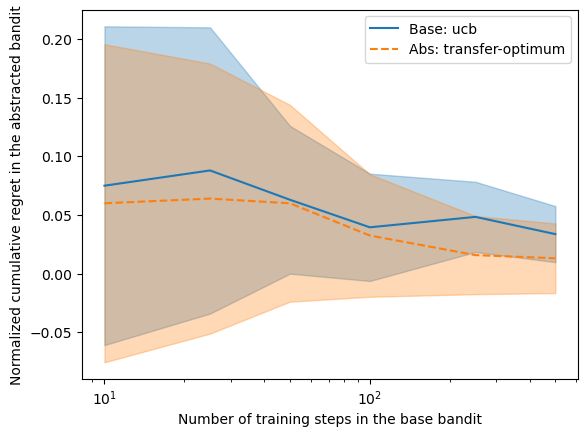

In [16]:
style = ['-','--']
for trainmode in [0,1]:
    plt.plot(n_steps,avgregrets[trainmode],label=labels[trainmode],linestyle=style[trainmode])
    bottom = stdregrets[trainmode]
    #bottom = [avgregrets[trainmode][steps] if avgregrets[trainmode][steps]-stdregrets[trainmode][steps]<0 else stdregrets[trainmode][steps] for steps in range(len(avgregrets[trainmode]))]
    plt.xscale('log')
    plt.xlabel('Number of training steps in the base bandit')
    plt.ylabel('Normalized cumulative regret in the abstracted bandit')
    plt.fill_between(n_steps,avgregrets[trainmode]+stdregrets[trainmode],avgregrets[trainmode]-bottom, color='C{0}'.format(trainmode), alpha=0.3)
    plt.legend()

In [17]:
avgregrets = np.zeros((len(labels),len(n_steps))) 
stdregrets = np.zeros((len(labels),len(n_steps)))

for trainmode in range(len(labels)):    
    for steps in range(len(n_steps)):
        regrets = []
        for trial in range(len(data['agents'][steps][trainmode])):
            regrets.append(data['agents'][steps][trainmode][trial].get_simple_regret())
        
        avgregrets[trainmode][steps] = np.mean(regrets)
        stdregrets[trainmode][steps] = np.std(regrets)

In [18]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

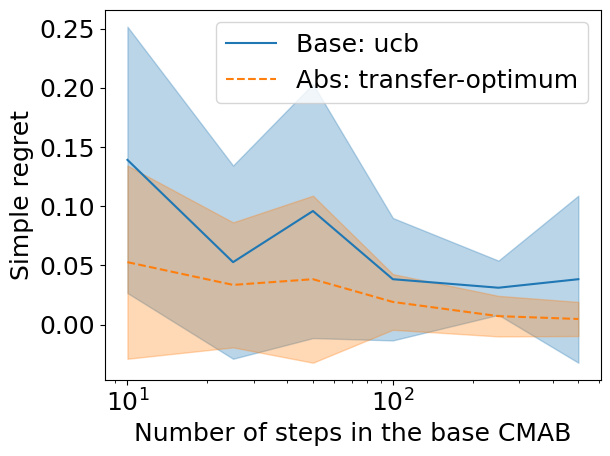

In [19]:
style = ['-','--']
for trainmode in [0,1]:
    plt.plot(n_steps,avgregrets[trainmode],label=labels[trainmode],linestyle=style[trainmode])
    bottom = stdregrets[trainmode]
    #bottom = [avgregrets[trainmode][steps] if avgregrets[trainmode][steps]-stdregrets[trainmode][steps]<0 else stdregrets[trainmode][steps] for steps in range(len(avgregrets[trainmode]))]
    plt.xscale('log')
    plt.xlabel('Number of steps in the base CMAB')
    plt.ylabel('Simple regret')
    plt.fill_between(n_steps,avgregrets[trainmode]+stdregrets[trainmode],avgregrets[trainmode]-bottom, color='C{0}'.format(trainmode), alpha=0.3)
    plt.legend()

### Plot data persistence 

In [20]:
joblib.dump(avgregrets,'proj CARLa 3_0/results/simul_1_1_avgregrets.pkl')

['proj CARLa 3_0/results/simul_1_1_avgregrets.pkl']